In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

# Set the float format to suppress scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# load the data
df = pd.read_csv("G:\我的雲端硬碟\Coding\IMDb\imdb_top_1000.csv")

# display the top 5 rows
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Wai\AppData\Local\Temp\ipykernel_10340\3393404865.py:2: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("G:\我的雲端硬碟\Coding\IMDb\imdb_top_1000.csv")


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
# check the types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [4]:
# find any duplicated
df[df.duplicated()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


In [5]:
# drop the irrelavant columns: Poster Link & Overview
df = df.drop(['Poster_Link', 'Overview'], axis=1)
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.60,76.00,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.60,84.00,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.60,85.00,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.60,78.00,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [6]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

3 cols have null values.

In [7]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.00,843.00,1000.00
mean,7.95,77.97,273692.91
std,0.28,12.38,327372.70
min,7.60,28.00,25088.00
25%,7.70,70.00,55526.25
50%,7.90,79.00,138548.50
75%,8.10,87.00,374161.25
max,9.30,100.00,2343110.00


<Axes: >

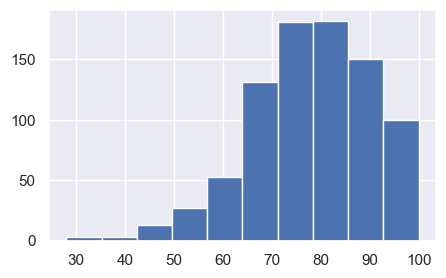

In [8]:
df['Meta_score'].hist(bins=10, figsize=(5, 3))

In [9]:
# From online: because the most movies is "U" (General Viewing for all ages)
df['Certificate'].fillna('U',inplace=True)

# Since the data is skewed, mean is less sensitive to outliers
df['Meta_score'].fillna(df['Meta_score'].mean(),inplace=True)

# Convert type to int to deal with it 
df["Gross"] = df["Gross"].str.replace(",","")
df["Gross"] = df["Gross"].replace(np.nan, 0)
df["Gross"] = df["Gross"].astype(float)

# fill null data with the avg gross
df["Gross"] = df["Gross"].replace(0,df['Gross'].mean())

C:\Users\Wai\AppData\Local\Temp\ipykernel_10340\1505989268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna('U',inplace=True)
C:\Users\Wai\AppData\Local\Temp\ipykernel_10340\1505989268.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [10]:
df.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [11]:
df['Runtime'] = df['Runtime'].str.replace(" min", "")
df["Runtime"] = df["Runtime"].astype(int)

In [12]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.00
1,The Godfather,1972,A,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.00
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.00
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.00
4,12 Angry Men,1957,U,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.60,76.00,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,56536877.98
996,Giant,1956,G,201,"Drama, Western",7.60,84.00,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,56536877.98
997,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.60,85.00,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.00
998,Lifeboat,1944,U,97,"Drama, War",7.60,78.00,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,56536877.98


In [13]:
cols = df.describe().columns

def find_outliers(x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[x] < lower_bound) | (df[x] > upper_bound)]
    
    print(f"異常值在欄位 '{x}' 中:")
    print(outliers)

for col in cols:
    find_outliers(col)

異常值在欄位 'Runtime' 中:
                                      Series_Title Released_Year Certificate  \
3                           The Godfather: Part II          1974           A   
5    The Lord of the Rings: The Return of the King          2003           U   
7                                 Schindler's List          1993           A   
25                                  The Green Mile          1999           A   
31                            Shichinin no samurai          1954           U   
71                     Once Upon a Time in America          1984           A   
116                             Lawrence of Arabia          1962           U   
140                             Gangs of Wasseypur          2012           A   
156                         Swades: We, the People          2004           U   
177                                         Sholay          1975           U   
194                                   Sherlock Jr.          1924      Passed   
206                 

In [43]:
df.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

Genre
Animation, Drama, War        8.50
Action, Sci-Fi               8.40
Drama, Musical               8.40
Drama, Mystery, War          8.35
Western                      8.35
                             ... 
Action, Adventure, Mystery   7.60
Action, Adventure, Family    7.60
Action, Adventure, Crime     7.60
Animation, Drama, Romance    7.60
Drama, War, Western          7.60
Name: IMDB_Rating, Length: 202, dtype: float64

Distribution of Movie Runtimes

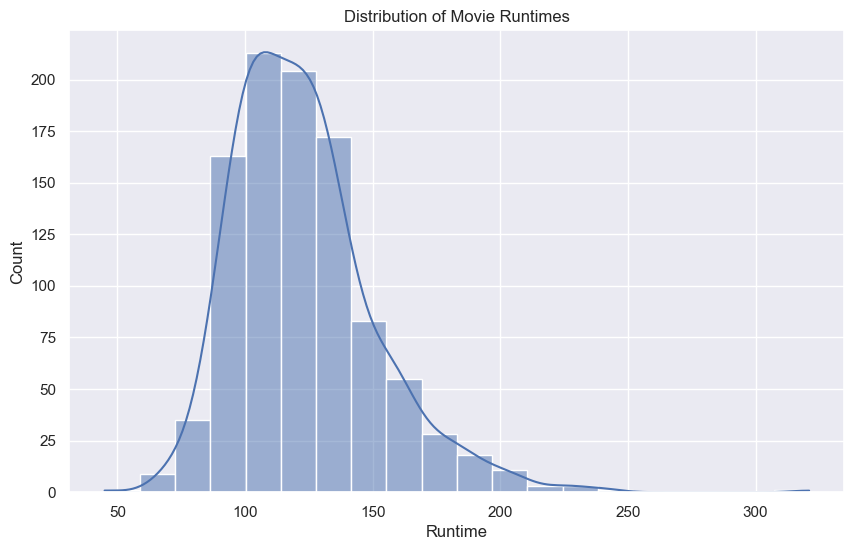

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Runtime'], bins=20, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.show()

Distribution of Certificate

<Axes: xlabel='count', ylabel='Certificate'>

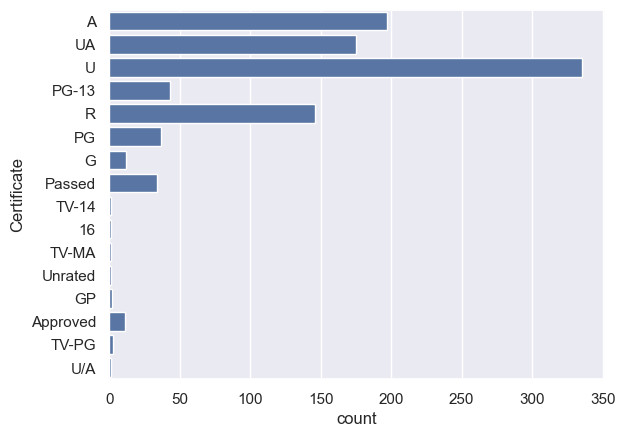

In [25]:
sns.countplot(data=df['Certificate'])

Most movies was 'U' certificate i.e. General Viewing for all ages.

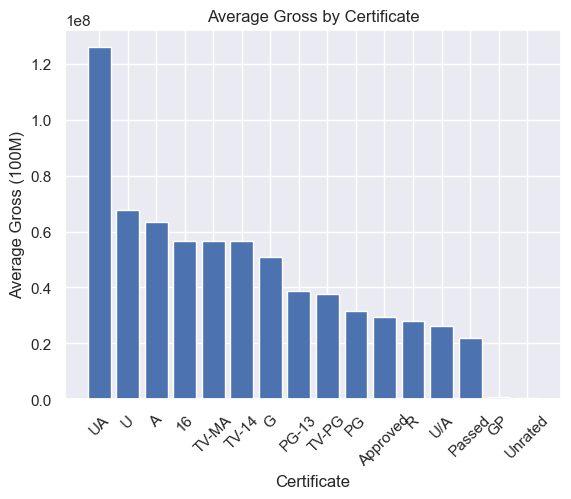

In [41]:
data = df.groupby('Certificate')['Gross'].mean().sort_values(ascending=False).reset_index()

plt.bar(data['Certificate'], data['Gross'])
plt.xlabel('Certificate') 
plt.ylabel('Average Gross (100M)')
plt.title('Average Gross by Certificate')
plt.xticks(rotation=45)
plt.show()

Top 10 Directors with Most Movies:

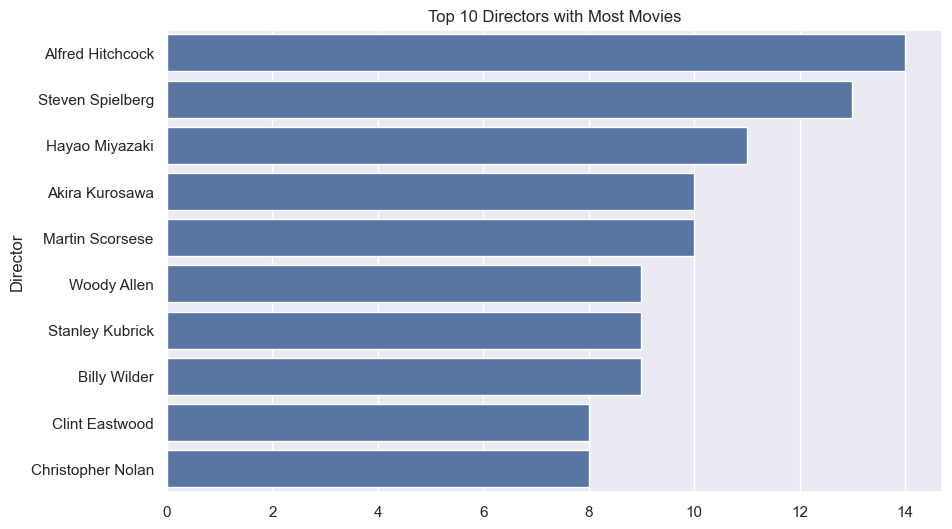

In [16]:
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors with Most Movies')
plt.show()

Gross Revenue VS IMDB

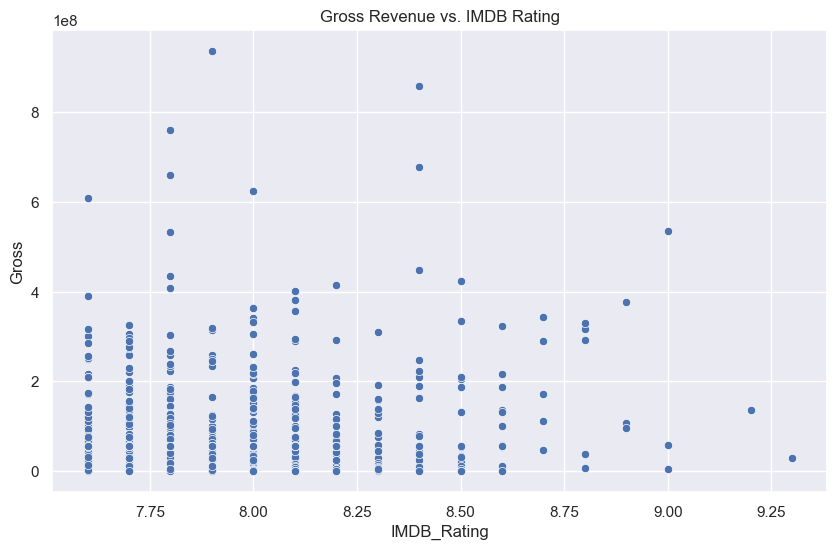

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df)
plt.title('Gross Revenue vs. IMDB Rating')
plt.show()

Movies per Genre

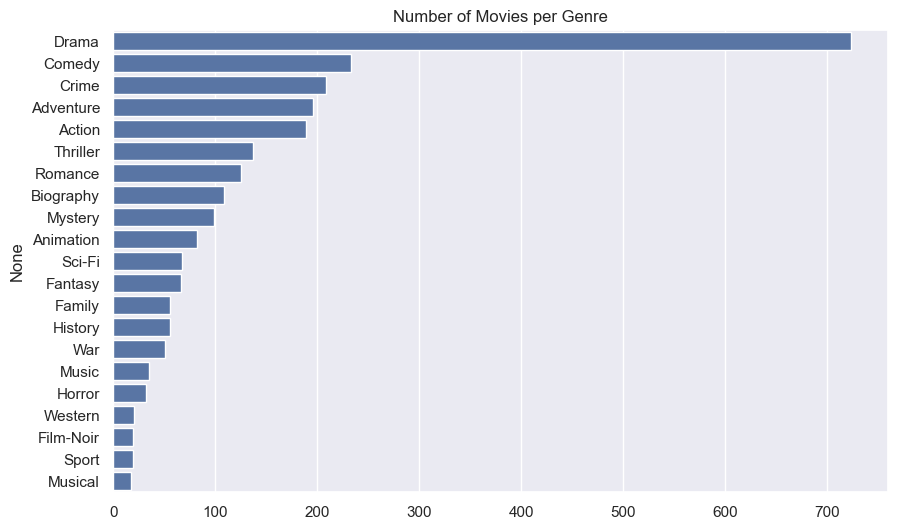

In [18]:
genre = df["Genre"].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=genre.values,y=genre.index)
plt.title("Number of Movies per Genre")
plt.show()

Top Actors Appearing in Movies:

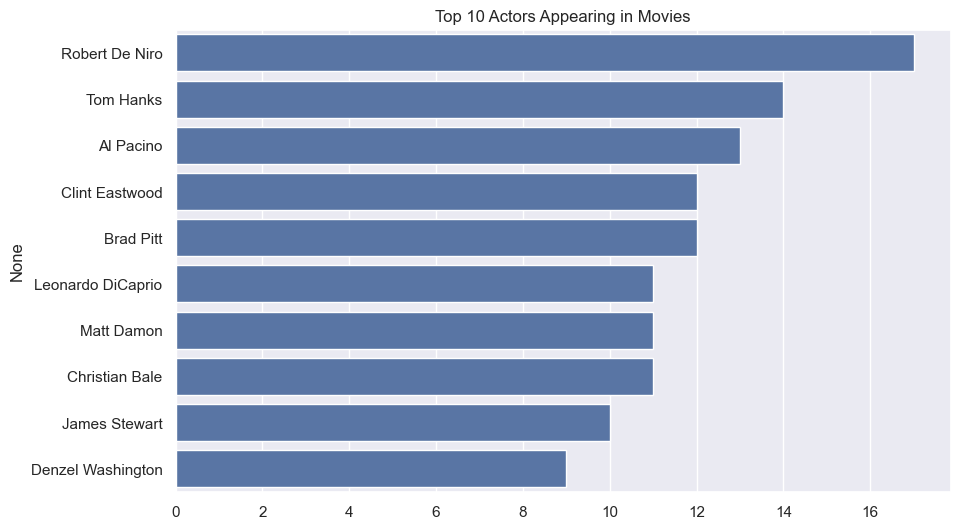

In [19]:
actors = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']]).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=actors.values, y=actors.index)
plt.title('Top 10 Actors Appearing in Movies')
plt.show()

Correlations

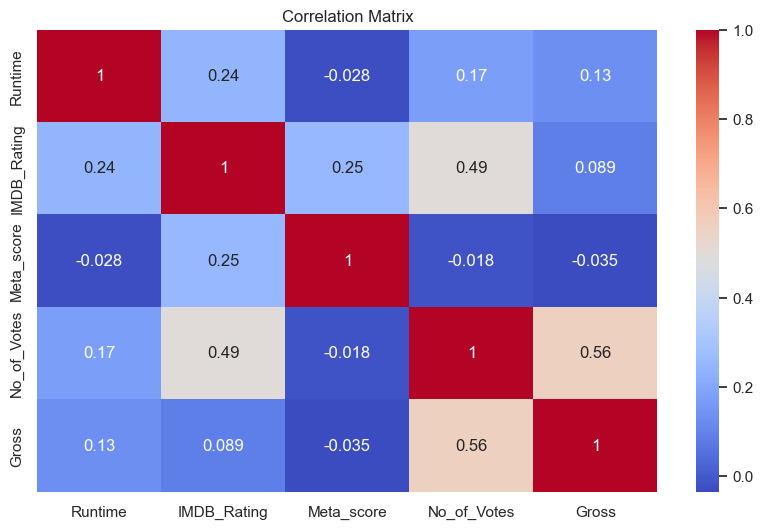

In [20]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()